<a href="https://colab.research.google.com/github/kimpitang/AI-Agent/blob/main/Autogen_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
!pip install --upgrade autogen
!pip install --upgrade autogen_ext

In [14]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ['OPENAI_API_KEY']= "" // openai api key

In [15]:
import autogen
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import Image

config_list = [{"model": "gpt-4o-mini", "api_key": os.environ["OPENAI_API_KEY"]}]
llm_config = {"config_list": config_list, "cache_seed": 42}

In [21]:
from autogen.coding import LocalCommandLineCodeExecutor

user_proxy = autogen.UserProxyAgent(
    name="User_proxy",
    system_message="A human admin.",
    code_execution_config={
        # the executor to run the generated code
        "executor": LocalCommandLineCodeExecutor(work_dir="group_chat"),
    },
    human_input_mode="NEVER",
)
coder = autogen.AssistantAgent(
    name="Coder",
    llm_config=llm_config,
)
critic = autogen.AssistantAgent(
    name="Critic",
    system_message="""비평가.
    명확한 근거를 제시하면서 1(나쁨)~10(좋음)의 점수를 제공하여 주어진 시각화 코드의 품질을 평가하는 데 고도록 숙련된 조력자입니다.
    각 평가에 대해 시각화 모범 사례를 고려해야 합니다. 구체적으로 다음 차원에서 코드를 신중하게 평가할 수 있습니다.
  - 버그(버그): 버그, 구문 오류 또는 오타가 있나요? 코드가 컴파일되지 않는 이유는 무엇인가요? 어떻게 수정해야 하나요?
  버그가 있는 경우 버그 점수는 반드시 5점 미만이어야 합니다.
  - 데이터 변환(변환): 데이터가 시각화 유형에 맞게 적절하게 변환되었나요?
  예를 들어, 필요한 경우 데이터 집합이 적절하게 필터링, 집계 또는 그룹화되었는가? 날짜 필드를 사용하는 경우, 날짜 필드가 먼저 날짜 개체 등으로 변환되었는가?
  - 목표 준수(규정 준수): 코드가 지정된 비주얼리제이션 목표를 얼마나 잘 충족합니까?
  - 시각화 유형(유형): 모범 사례를 고려할 때 시각화 유형이 데이터 및 의도에 적합한가?
  인사이트를 전달하는 데 더 효과적인 시각화 유형이 있는가? 다른 시각화 유형이 더 적절하다면 점수는 반드시 5점 미만이어야 합니다.
  - 데이터 인코딩(인코딩): 데이터가 시각화 유형에 맞게 적절하게 인코딩되어 있습니까?
  - 미학(심미성): 시각화의 미학이 시각화 유형 및 데이터에 적합한가?

  위의 각 차원에 대해 점수를 제공해야 합니다.
  {bugs: 0, 변환: 0, 구정 준수: 0, type: 0, encoding: 0, 미학: 0}
  코드를 제안하지 마세요.
  마지막으로 위의 비평을 바탕으로 코더가 코드를 개선하기 위해 취해야 할 구체적인 조치 목록을 제안하세요.
  """,
    llm_config=llm_config,
)

groupchat = autogen.GroupChat(agents=[user_proxy, coder, critic], messages=[], max_round=20)
manager = autogen.GroupChatManager(groupchat=groupchat, llm_config=llm_config)

In [22]:
user_proxy.initiate_chat(
    manager,
    message="""다음 URL(https://github.com/mwaskom/seaborn-data/blob/master/titanic.csv)에서 데이터를 다운로드하고,
    age와 pclass 변수 간의 관계를 차트로 생성해주세요. 차트는 파일로 저장해주세요.
    차트를 생성하기 이전에 확인을 위해 데이터셋의 열을 출력하세요.
    """,
)
# type exit to terminate the chat

User_proxy (to chat_manager):

다음 URL(https://github.com/mwaskom/seaborn-data/blob/master/titanic.csv)에서 데이터를 다운로드하고,
    age와 pclass 변수 간의 관계를 차트로 생성해주세요. 차트는 파일로 저장해주세요.
    차트를 생성하기 이전에 확인을 위해 데이터셋의 열을 출력하세요.
    

--------------------------------------------------------------------------------

Next speaker: Coder

Coder (to chat_manager):

먼저, 주어진 URL에서 데이터를 다운로드하고, 데이터셋의 열을 출력한 다음, `age`와 `pclass` 변수 간의 관계를 차트로 생성하겠습니다. 최종적으로 차트를 파일로 저장하겠습니다.

1단계: 데이터를 다운로드하고 데이터셋의 열을 출력합니다.

여기서는 pandas 라이브러리를 사용하여 데이터를 처리할 것입니다. 아래 코드를 실행하여 이 작업을 수행합니다.

```python
# filename: download_and_check.py
import pandas as pd

# 데이터를 URL에서 다운로드
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv"
data = pd.read_csv(url)

# 데이터셋의 열 출력
print(data.columns.tolist())
```

이 코드를 실행하여 데이터셋의 열을 확인하세요. 완료되면 결과를 알려주세요.

--------------------------------------------------------------------------------

Next speaker: User_proxy


>>>>>>>> EXECUTING CODE BLOCK (inferred language is pytho

ChatResult(chat_id=None, chat_history=[{'content': '다음 URL(https://github.com/mwaskom/seaborn-data/blob/master/titanic.csv)에서 데이터를 다운로드하고,\n    age와 pclass 변수 간의 관계를 차트로 생성해주세요. 차트는 파일로 저장해주세요.\n    차트를 생성하기 이전에 확인을 위해 데이터셋의 열을 출력하세요.\n    ', 'role': 'assistant', 'name': 'User_proxy'}, {'content': '먼저, 주어진 URL에서 데이터를 다운로드하고, 데이터셋의 열을 출력한 다음, `age`와 `pclass` 변수 간의 관계를 차트로 생성하겠습니다. 최종적으로 차트를 파일로 저장하겠습니다.\n\n1단계: 데이터를 다운로드하고 데이터셋의 열을 출력합니다.\n\n여기서는 pandas 라이브러리를 사용하여 데이터를 처리할 것입니다. 아래 코드를 실행하여 이 작업을 수행합니다.\n\n```python\n# filename: download_and_check.py\nimport pandas as pd\n\n# 데이터를 URL에서 다운로드\nurl = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv"\ndata = pd.read_csv(url)\n\n# 데이터셋의 열 출력\nprint(data.columns.tolist())\n```\n\n이 코드를 실행하여 데이터셋의 열을 확인하세요. 완료되면 결과를 알려주세요.', 'name': 'Coder', 'role': 'user'}, {'content': "exitcode: 0 (execution succeeded)\nCode output: ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_m

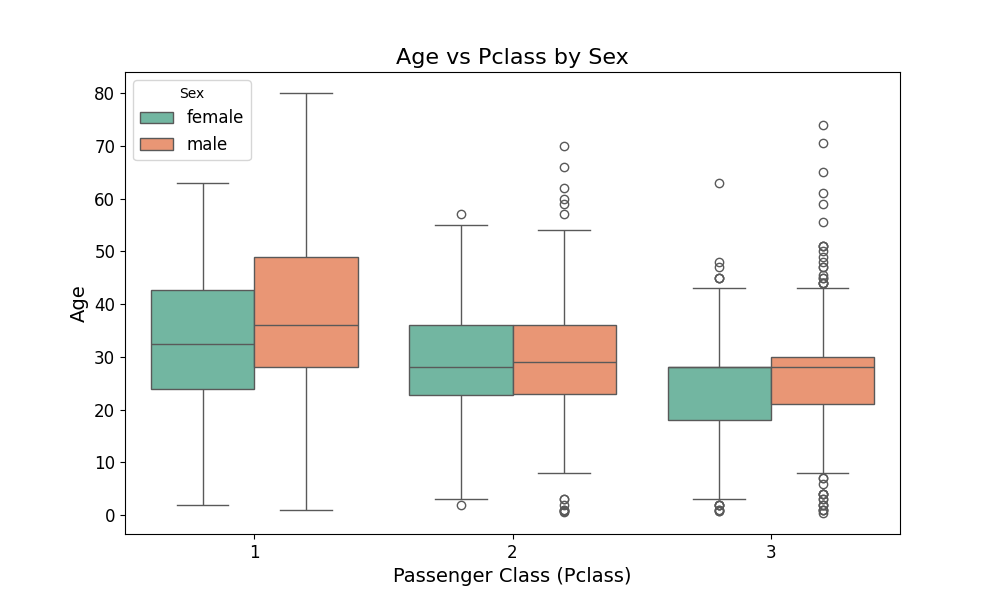

In [26]:
Image(filename="group_chat/final_improved_age_vs_pclass.png")